In [2]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
import sys
import os

folder = '../../../../crispy'
print(folder)
if folder not in sys.path: sys.path.append(folder)

from crispy.params import Params
folder = '../../../crispy'
par = Params(folder)

from crispy.tools.initLogger import getLogger
log = getLogger('crispy')
from crispy.tools.imgtools import scale2imgs,bowtie
from crispy.tools.image import Image
from astropy.io import fits
import astropy.units as u
from crispy.tools.postprocessing import mf
lamc=660.
BW = 0.18
par.nonoise=True
sampling=2.0
par.lenslet_sampling=1./sampling
folder = '/Users/mrizzo/IFS/OS5_SIM_'+str(sampling)


Populating the interactive namespace from numpy and matplotlib
../../../../crispy


crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0/average/offaxis_planet.fits


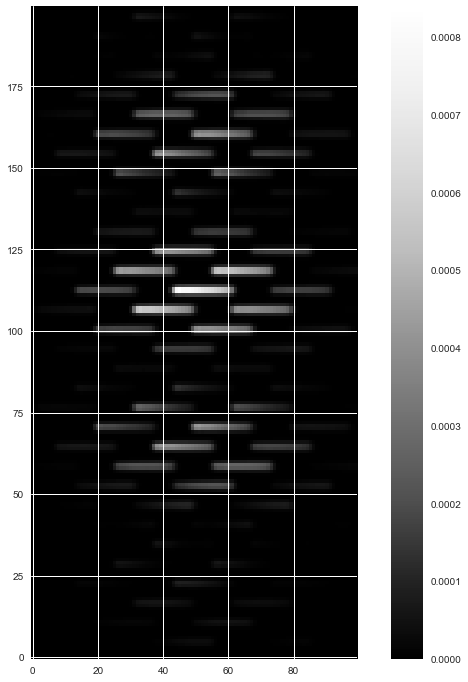

In [16]:
offaxis = Image(folder+"/average/offaxis_planet.fits")
plt.figure(figsize=(12,12))
plt.imshow(offaxis.data[400:600,580:680],cmap='Greys_r')
plt.colorbar()

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(np.sum(offaxis))


crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0/average/offaxis_planet_red_optext.fits
crispy - INFO - Read inverse variance from HDU 2 of /Users/mrizzo/IFS/OS5_SIM_2.0/average/offaxis_planet_red_optext.fits


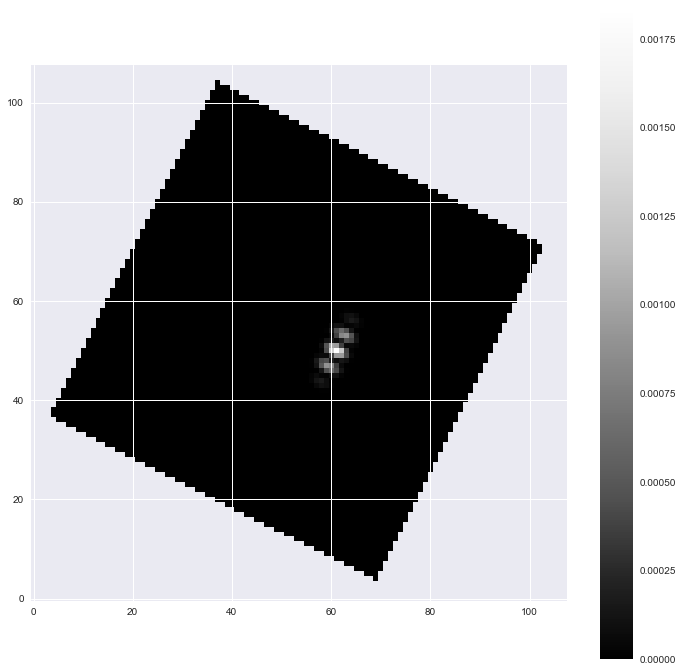

In [4]:
offaxis_ideal = Image(folder+"/average/offaxis_planet_red_optext.fits")

plt.figure(figsize=(12,12))
plt.imshow(offaxis_ideal.data[7],cmap='Greys_r')
plt.colorbar()

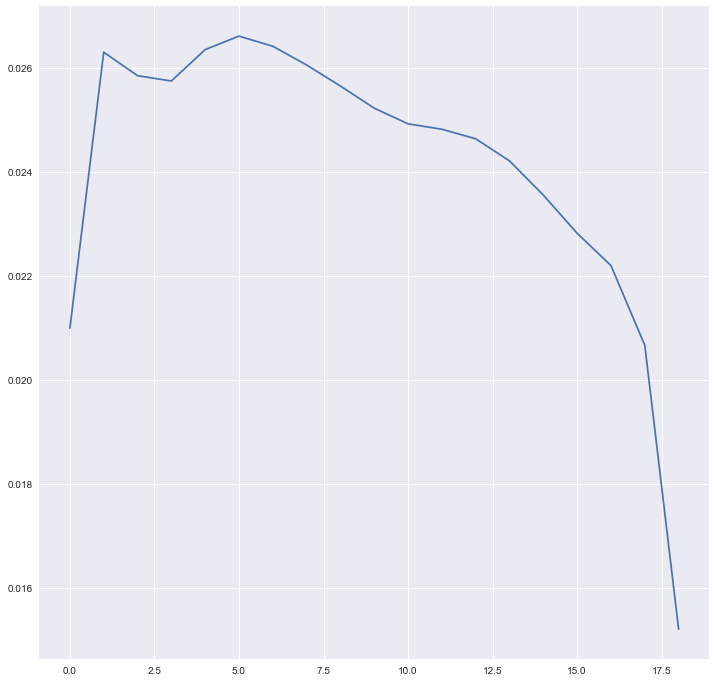

In [10]:
plt.figure(figsize=(12,12))
plt.plot(np.nansum(np.nansum(offaxis_ideal.data,axis=2),axis=1))


In [20]:
matched_filter = np.zeros(offaxis_ideal.data.shape)
signal = np.zeros(offaxis_ideal.data.shape[0]) # on source

threshold = 0.5

for slicenum in range(offaxis_ideal.data.shape[0]):
    # ON
    offaxis_ideal_norm = offaxis_ideal.data[slicenum]/np.nansum(offaxis_ideal.data[slicenum])
    this_slice = offaxis_ideal_norm/np.nansum((offaxis_ideal_norm)**2)
    # calculate correction factor since we are going to crop only the top the of the hat
    # this is the inverse ratio of the contribution of the brightest pixels over the rest
    msk = (this_slice>threshold)
    aper_phot = np.nansum(this_slice)/np.nansum(this_slice[msk])
    # Set all low-contributing pixels to 0.0
    this_slice[~msk] = 0.0
    matched_filter[slicenum,:,:] = this_slice
    # Multiply what is left by that aperture correction factor
    matched_filter[slicenum,:,:]*=aper_phot
    signal[slicenum] = np.nansum(matched_filter[slicenum,:,:]*offaxis_ideal.data[slicenum,:,:])


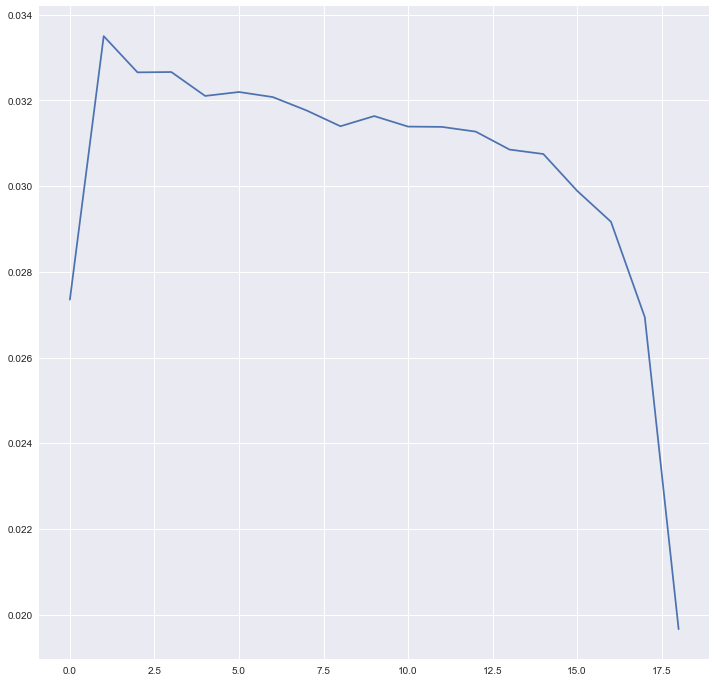

In [21]:
plt.figure(figsize=(12,12))
plt.plot(signal)
